In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

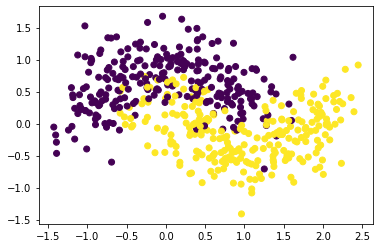

In [2]:
X,y=make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)

In [3]:
Xtrain,Xtest,ytrain,ytest =train_test_split(X,y,test_size=0.3,random_state=0)

# VOTING

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [5]:
model1=SGDClassifier(random_state=0)
model2=DecisionTreeClassifier(random_state=0)
model3=KNeighborsClassifier(n_neighbors=2)

model4=VotingClassifier(estimators=[('SGD',model1),('Tree',model2),('KNN',model3)],voting='hard')

In [6]:
for model in (model1,model2,model3,model4):
    model.fit(Xtrain,ytrain)
    print(model.__class__.__name__,model.score(Xtest,ytest))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


# BAGGING
avec modèle qui font de l'overfitting

In [7]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [8]:
model=BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=100)

In [9]:
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.8866666666666667

In [10]:
RandomForestClassifier(n_estimators=100,max_depth=10).fit(Xtrain,ytrain).score(Xtest,ytest)

0.88

# BOOSTING
avec modèles qui font de l'underfitting

In [11]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [12]:
model=AdaBoostClassifier(n_estimators=100,learning_rate=1.5)

In [13]:
model.fit(Xtrain,ytrain).score(Xtest,ytest)

0.8866666666666667

# STACKING
permet d'associer déjà des modèles puissants attention, très lente

In [15]:
from sklearn.ensemble import StackingClassifier

In [16]:
model4=StackingClassifier(estimators=[('SGD',model1),('Tree',model2),('KNN',model3)],
                          final_estimator=KNeighborsClassifier())

In [17]:
model4.fit(Xtrain,ytrain).score(Xtest,ytest)

0.8666666666666667

In [18]:
SGD = SGDClassifier(random_state = 0)
Tree = DecisionTreeClassifier(random_state = 0)
KNN = KNeighborsClassifier()

modele_1 = BaggingClassifier(base_estimator = KNN, n_estimators = 100)
modele_2 = BaggingClassifier(base_estimator = Tree, n_estimators = 100)
modele_3 = BaggingClassifier(base_estimator = SGD, n_estimators = 100)

final_model = StackingClassifier([('Bag_KNN', modele_1),
                                  ('Bag_Tree', modele_2),
                                  ('Bag_SGD', modele_3)],
                                  final_estimator = KNN
)

In [19]:
final_model.fit(Xtrain,ytrain).score(Xtest,ytest)

0.8866666666666667

In [20]:
ADA=AdaBoostClassifier(n_estimators=100,learning_rate=1.5)
RDF=RandomForestClassifier(n_estimators=100,max_depth=10)

stacking=StackingClassifier(estimators=[('Ada',ADA),('Rdf',RDF)],final_estimator=KNeighborsClassifier())

In [22]:
stacking.fit(Xtrain,ytrain).score(Xtest,ytest)

0.8133333333333334